# 2.2 Constant Time

In the constant time process, the algorithm runs for about the same amount of time regardless of the length of your list. 


---
([Wikipedia](https://en.wikipedia.org/wiki/Time_complexity))

An algorithm is said to be constant time (also written as O(1) time) if **the value of T(n) is bounded by a value that does not depend on the size of the input**. For example,:
- accessing any single element in an array 
  - as only one operation has to be performed to locate it. 
- finding the minimal value in an array sorted in ascending order; 
  - it is the first element.

## Get-first-item

In [ ]:
def get_first_item(my_list):
    return my_list[0]

In [ ]:
short_list = [15, 53, 258]
long_list = [42] * 10**8   # one hundred million items

In [ ]:
# take a snapshot of what time it is upon start and end.
def timer(func, x):
    start_time = time.process_time()
    item = func(x)
    end_time = time.process_time()
    print(f'{end_time - start_time} seconds')
    return item

In [ ]:
# Doesn't seem that there is any great difference in the process time.
short_first = timer(get_first_item, short_list)
long_first = timer(get_first_item, long_list)

6.634000001781715e-06 seconds
4.740000001390854e-06 seconds


In [ ]:
short_first, long_first

(15, 42)

## Get-first-item from lists of varying lengths

In [ ]:
list_lengths = [10**exponent for exponent in range(1, 9)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

In [ ]:
constant_times = []

for length in list_lengths:
    li = [42] * length

    start = time.process_time()
    x = get_first_item(li)
    end = time.process_time()

    constant_times.append(end - start)

In [ ]:
# The runtime for the operation didni't really change. No significant difference.
constant_times_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['length', 'time'])
constant_times_df

,length,time
0,10,6.419000e-06
1,100,1.082000e-06
2,1000,8.630000e-07
3,10000,9.080000e-07
4,100000,2.250000e-06
5,1000000,1.045000e-05
6,10000000,1.560900e-05
7,100000000,1.834170e-04


## Experiment: get-middle-item

The function below `create_list_get_middle_item()` creates a list of a given length [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000] and gets the item in the mid-index position in the list. 

<br/>

**Observations**
- from 6th length 1,000,000 (million), the algorithm takes a significant around of time.
        1) a million items: 3.13 seconds
        2) 10 million items: 30.81 seconds
        3) 100 million items: 

In [ ]:
def create_list_get_middle_item(length):
    random_list = [np.random.randint(1, 100) for num in range(length)]
    index = int(np.ceil(len(random_list)/2))
    return random_list[index]

In [ ]:
def timer(func, x):
    start_time = time.process_time()
    item = func(x)
    end_time = time.process_time()
    print(f'for a list of {x} items: {end_time - start_time} seconds')
    return item

In [ ]:
items = []
for length in list_lengths:
    item = timer(create_list_get_middle_item, length)
    items.append(item)

for a list of 10 items: 0.0001476269999969304 seconds
for a list of 100 items: 0.0006050300000026709 seconds
for a list of 1000 items: 0.005656954000002656 seconds
for a list of 10000 items: 0.03701974300000188 seconds
for a list of 100000 items: 0.3147787919999985 seconds
for a list of 1000000 items: 3.131447499999993 seconds
for a list of 10000000 items: 30.814308366000006 seconds
for a list of 100000000 items: 307.168835958 seconds


In [ ]:
times = [0.0001476269999969304, 0.0006050300000026709, 0.005656954000002656, 
         0.03701974300000188, 0.3147787919999985, 3.131447499999993, 
         30.814308366000006, 307.168835958]

In [ ]:
import pandas as pd

constant_df = pd.DataFrame(list(zip(list_lengths, times)), columns=['length', 'time'])
constant_df

,length,time
0,10,0.000148
1,100,0.000605
2,1000,0.005657
3,10000,0.037020
4,100000,0.314779
5,1000000,3.131447
6,10000000,30.814308
7,100000000,307.168836


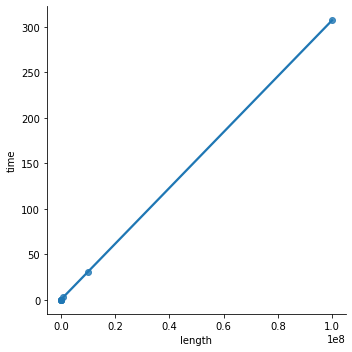

In [ ]:
import seaborn as sb 

sb.lmplot(x='length', y='time', data=constant_df, ci=None)

# Important Functions

- `sns.lmplot(x='n', y='time', data=dataset, ci=None)`
  - lmplot = linear model (regression) plot
  - ci: confidence intreval
- `pd.DataFrame(list(zip(list1, list2, ..., list_n))`
  - `list(zip(item1, item2 ... item_n))`
- `time.process_time()`

References

My algorithm learning notebook following the live lesson series [**"Data Structures, Algorithms, and Machine Learning Optimization"**](https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and (some of them entirely) from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb